# Automatic source detection

In most of SITELLE data cubes there are numerous point-like emission-line objects which velocity is unknown. There is a simple algorithm which can help in their discovery. This algorithm is described in Martin et al. 2017 (http://arxiv.org/abs/1707.01366) and is based on the measurement of the highest emission of each pixel with respect to its neighbourhood. It delivers a map if the net emission which helps in detecting point-like emission but minimizes the diffuse emission.

Two versions of the algorithm (one fast and the one much slower) can be choosen. the fast version will take less than half an hour and will deliver a map with some artifacts but which gives a good idea of what can be obtained with the much slower algorithm.

In [5]:
# inline plotting for jupyter notebook. Do not put this line in a real python script.
%matplotlib inline
# import base class for the manipulation of a SITELLE spectral cube: HDFCube
from orcs.process import SpectralCube
import pylab as pl
import numpy as np
cube = SpectralCube('/home/thomas/M31_SN3.merged.cm1.1.0.hdf5')

17-07-27|16:30:38 # SpectralCube.__init__ > Data shape : (2048, 2064, 840)
17-07-27|16:30:38 # SpectralCube.__init__ > Cube is in WAVENUMBER (cm-1)
17-07-27|16:30:38 # SpectralCube.__init__ > Cube is CALIBRATED


In [4]:
cube.detect_sources(fast=True)

17-07-25|17:40:44 # SpectralCube.detect_sources > Source detection using fast algorithm
17-07-25|17:40:44 # SpectralCube.detect_sources > Signal range: [14583.211806568279, 15462.642256308758] cm-1, (270, 608) pixels
Init of the parallel processing server with 4 threads
17-07-25|17:40:45 # SpectralCube.detect_sources > Extracting frames: 270 to 309 (/338 frames)
 [==========] [100%] [completed in 4m26s]                                     
17-07-25|17:46:08 # SpectralCube.detect_sources > Extracting frames: 310 to 349 (/338 frames)
 [==========] [100%] [completed in 1m51s]                                     
17-07-25|17:48:48 # SpectralCube.detect_sources > Extracting frames: 350 to 389 (/338 frames)
 [==========] [100%] [completed in 1m50s]                                     
17-07-25|17:51:27 # SpectralCube.detect_sources > Extracting frames: 390 to 429 (/338 frames)
 [==========] [100%] [completed in 1m54s]                                     
17-07-25|17:54:11 # SpectralCube.dete

Here the file `M31_SN3.1.0.ORCS/M31_SN3.1.0.SpectralCube.detection_frame.fits` is the generated detection map. You can see below a small excerpt of the detection map where numerous emission sources are visible which were undetectable in the deep frame.

(800, 1200)

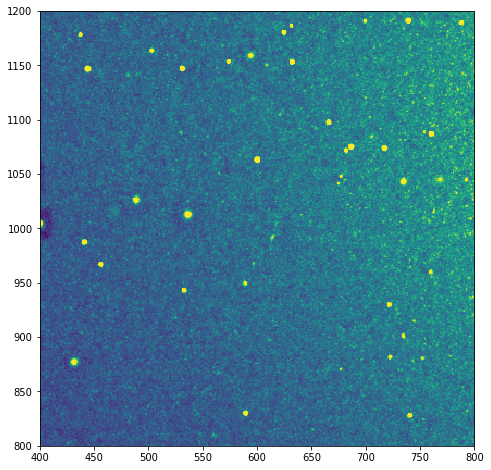

In [9]:
import orb.utils.io as io
detect_map = io.read_fits('M31_SN3.1.0.ORCS/M31_SN3.1.0.SpectralCube.detection_frame.fits')
pl.figure(figsize=(8,8))
pl.imshow(detect_map.T, vmin=np.nanpercentile(detect_map,5),
         vmax = np.nanpercentile(detect_map, 99))
pl.xlim((400,800))
pl.ylim((800,1200))